In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
PATH = r'C:\Users\latee\Downloads\youtube-new\USvideos.csv'
YOUTUBE = pd.read_csv(PATH) 

In [3]:
YOUTUBE.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [4]:
YOUTUBE.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### Single Var plots

To be honest I do not like this plot much. It doesn't tell me a lot about views with-in this dataset other then there may be a few observations where the views recorded is really high.

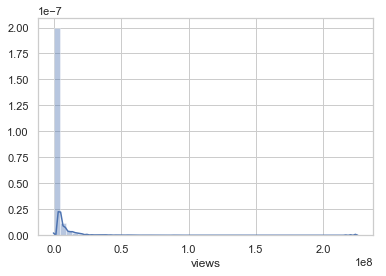

In [59]:
# single var DENSITY PLOT
sns.distplot(YOUTUBE['views'])

I like this one a little better because it tells me more about the density of views within each row of the dataset.
Con: This plot still is not telling us a lot about views.

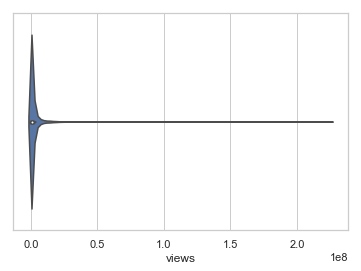

In [62]:
# VIOLIN_PLOT
sns.violinplot(data=YOUTUBE, x='views')

Out of all of the one variable plots here, this one is my least favorite. 
It's quite hard to read with no real information beign displayed other than a range of views.

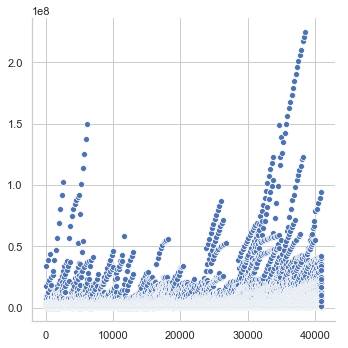

In [63]:
sns.relplot(data=YOUTUBE['views'])

This is my favorite of the single variable plots created here. This one give the most insight into the distribution of views between observations in the this dataset. 

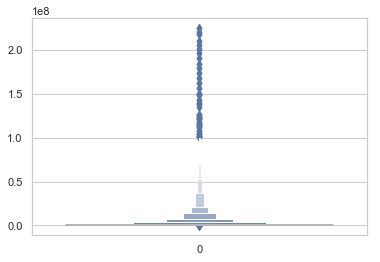

In [64]:
sns.set(style='whitegrid')
sns.boxenplot(data=YOUTUBE['views'])

### 2 Variables

Pro: This one tells me a little bit about the relationship between likes and dislikes. 
Con: There seems to be a lot of overlap that may be hiding some interesting information about these variable relationships. 

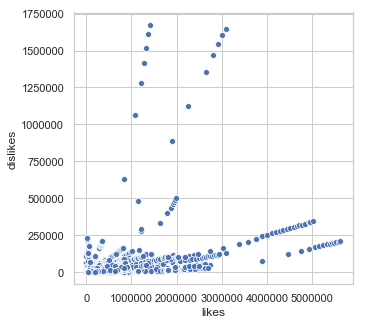

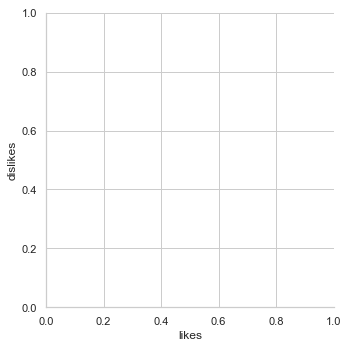

In [68]:
DIMS = (5,5)
fig, ax = plt.subplots(figsize=DIMS)
sns.relplot(x='likes', y='dislikes', data=YOUTUBE, ax=ax);

This one is quite informative regarding the relationship between likes and dislikes.

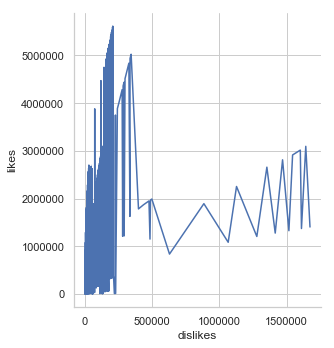

In [72]:
sns.relplot(x='dislikes', y='likes', data=YOUTUBE, kind='line')

This one is one of the least information mative here only sharing minimal information regrading the distribution of this relationship across the dataset. 

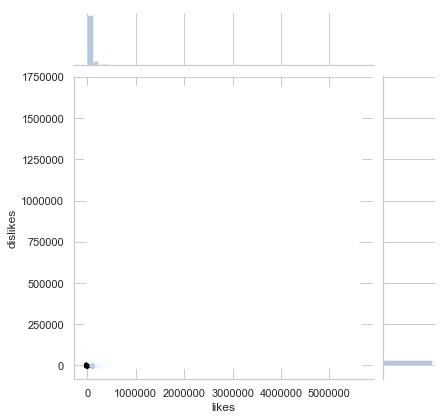

In [71]:
def joint(df):
    x = df['likes']
    y = df['dislikes']
    sns.jointplot(x, y, kind='hex')
joint(YOUTUBE)

### Continous & Catergorical

This plot is informatative regarding the density of dislikes to videos with comments disabled and comments enabled.

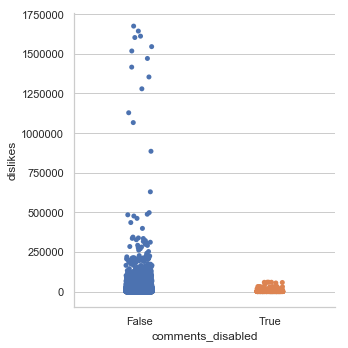

In [73]:
sns.catplot(x='comments_disabled', y='dislikes', data=YOUTUBE)

This plot isn't as informatative but some insights can be gained from looking at this plot. 

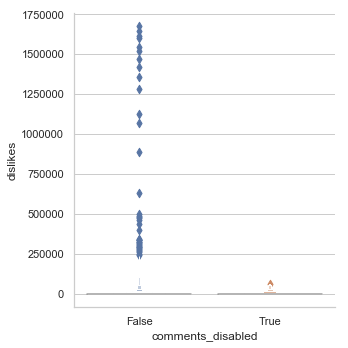

In [74]:
sns.catplot(x='comments_disabled', y='dislikes', data=YOUTUBE, kind='boxen')

I am a little confused by this plot, dislikes do not seem to be consistant with other plots and why would there be a need for an error bar?

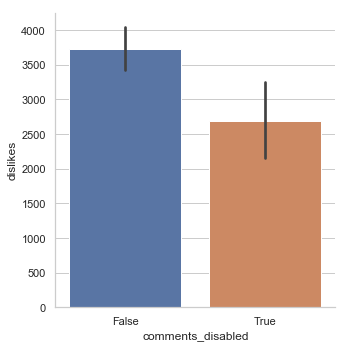

In [75]:
sns.catplot(x='comments_disabled', y='dislikes', data=YOUTUBE, kind='bar')

This plot is pretty cool becuase it removes the liklihood that someone could misinterpret the "closeness" in dislikes between videos with comments enabled/disabled. 

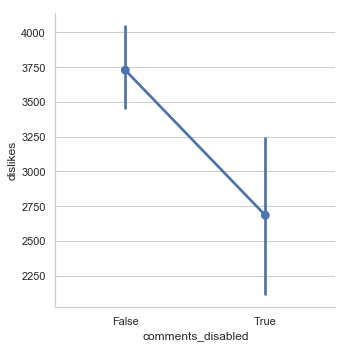

In [76]:
sns.catplot(x='comments_disabled', y='dislikes', data=YOUTUBE, kind='point')

This plot is not bringing anything new to the table and the regression line makes me think that this plot would be a bad choice for this data. 

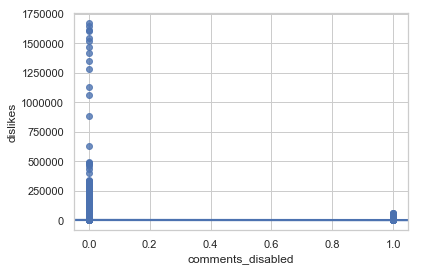

In [77]:
sns.regplot(x='comments_disabled', y='dislikes', data=YOUTUBE)

The following plot also does not tell us a lot about the data, but it does give some insight into the distributions of dislikes when the comments are enabled/disabled. 

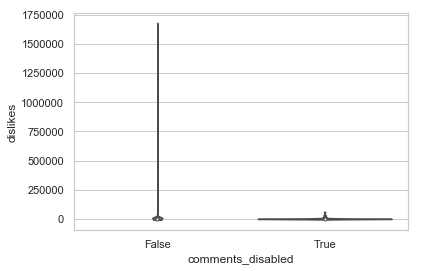

In [17]:
sns.violinplot(x='comments_disabled', y='dislikes', data=YOUTUBE)

# 2017 World Happiness Stats 

In [41]:
PATH2 = r'C:\Users\latee\Downloads\world-happiness\2017.csv'
V_RATE = pd.read_csv(PATH2)

In [42]:
V_RATE.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


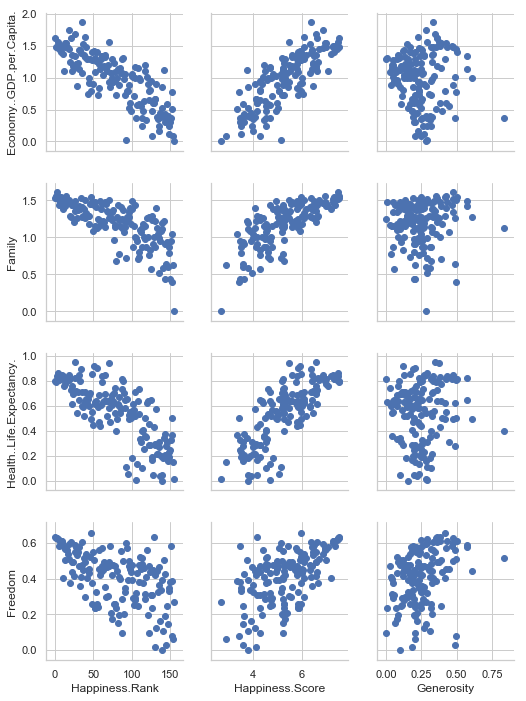

In [78]:
x = sns.PairGrid(V_RATE, x_vars=["Happiness.Rank", "Happiness.Score", "Generosity"], \
                 y_vars=["Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom"])
x.map(plt.scatter)


I can see that the above happiness score is at least moderately correlated with all of the variables on the y-axis. Assuming that having a rank closer to one is a good thing, the happiness rank might be redundantly sharing information about variable relationships. Generosity, doesn't seem to be moderately correlated with any of the variables on the y-axis. 